In [1]:
import numpy as np
import cv2
from matplotlib import pylab as plt
from random import randint
from scipy import ndimage
import os
import re

### Function which is used for augmentation

In [2]:
def generate(img, apply_resize = False, resize_str = 20, remove_excess = True, excess_str = 140, apply_flip = False, flip_random = True, apply_rotation = False, rotation = None, padding_val = 255, apply_transformation = False, transformation_dir = None, apply_boldness = False, boldness_dir = None, boldness_str = None, add_noise = False, noise_threshold = 0.999, scale_to_binary = False, binary_threshold = 140, normalize = False):
    #Select random image subclass
    #Randomize the size of the image
    if apply_resize:
        img = cv2.resize(img, [randint(img.shape[1]-resize_str,img.shape[1]+resize_str),randint(img.shape[0]-resize_str,img.shape[0]+resize_str)])
    #Flip the image along vertical axis.
    if apply_flip:
        if flip_random:
            if randint(0,1) == 0:
                img = cv2.flip(img,1)
        else:
            img = cv2.flip(img,1)
    #Randomize the rotation of the image.
    if apply_rotation:
        if rotation == None:
            rotation = randint(0,359)
        img = ndimage.rotate(img, rotation, mode='constant',cval=padding_val)
    if apply_transformation:
        #Add padding for affine transformation. Otherwise the picture might not be in bounds.
        img = np.pad(img, (100, 100), 'constant', constant_values=(padding_val, padding_val))
        #Originial right triangle
        pts1 = np.float32([[3,3],[3,10],[10,3]])
        if transformation_dir == None:
            transformation_dir = randint(0,2)
        if transformation_dir == 0:
            pts2 = np.float32([[randint(1,5),randint(1,5)],[3,10],[10,3]])
        if transformation_dir == 1:
            pts2 = np.float32([[3,3],[randint(1,5),randint(8,12)],[10,3]])
        if transformation_dir == 2:
            pts2 = np.float32([[3,3],[3,10],[randint(8,12),randint(1,5)]])
        #Get transformation
        M = cv2.getAffineTransform(pts1,pts2)
        #Apply transformation
        img  = cv2.warpAffine(img ,M,(img.shape[1],img.shape[0]),borderValue = 255)
    #Remove excess rows and columns that appeared after rotation and padding
    if remove_excess:
        img = img[np.argwhere(np.amin(img,axis=1) < excess_str)[0][0]:np.argwhere(np.amin(img,axis=1) < excess_str)[-1][0],:]
        img = img[:,np.argwhere(np.amin(img,axis=0) < excess_str)[0][0]:np.argwhere(np.amin(img,axis=0) < excess_str)[-1][0]]
    img = cv2.resize(img, [100,100]) #Resize back to 100x100
    
    #dilation and erosion
    if apply_boldness:
    #If randint = 2, then we apply neither.
        kernel = np.ones((3,3),np.uint8) #Kernel 3x3 seemed to work fine.
        if boldness_dir == None:
            boldness_dir = randint(-1,1) #If 0 we apply neither.
        if boldness_str == None:
            boldness_str = 1
        if boldness_dir == 1: #OpenCV erodes white to black. In our case function erode actually dilates.
            img = cv2.erode(img,kernel,iterations = boldness_str)
        if boldness_dir == -1:
            img = cv2.dilate(img,kernel,iterations = boldness_str)
    
    #Apply noise by changing random pixels to one.
    if add_noise:
        img[np.random.rand(img.shape[0],img.shape[1]) > noise_threshold] = 0
    
    #Changes all the pixels with drawing to one and all the "empty" pixels to 0.
    if scale_to_binary:
        img[img <= binary_threshold] = 1
        img[img > binary_threshold] = 0
        
    if normalize:
        img = img / 255
    
    return img

### Read in the image

In [3]:
img = cv2.imread("symbols_converted/advance_to_contact1.png", 0)

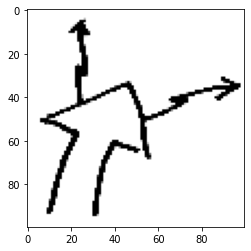

In [4]:
plt.imshow(img ,cmap='gray')

### Rotate

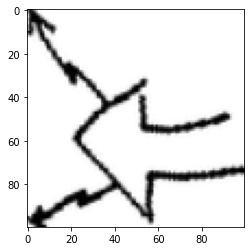

In [5]:
i = 14
plt.imshow(generate(img, apply_rotation = True, padding_val = img[0,0], rotation = 8*i) ,cmap='gray')

### Make line bolder

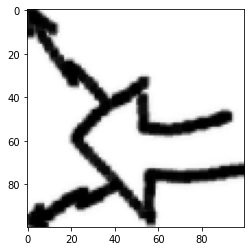

In [6]:
plt.imshow(generate(img, apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_boldness = True, boldness_dir = 1, boldness_str = 1) ,cmap='gray')

### Make line thinner

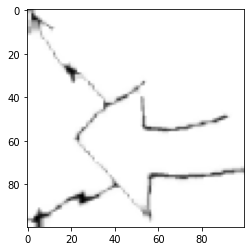

In [7]:
plt.imshow(generate(img, apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_boldness = True, boldness_dir = -1, boldness_str = 1) ,cmap='gray')

### Add randomized resize.

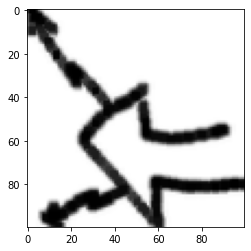

In [8]:
plt.imshow(generate(img, apply_resize = True, apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_boldness = True, boldness_dir = 1, boldness_str = 1) ,cmap='gray')

### Remove resize, add skewning
Skewing is randomized. Run again to see different results.

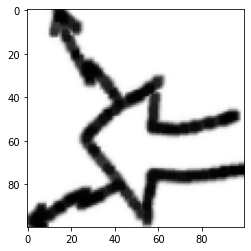

In [9]:
plt.imshow(generate(img,apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_transformation = True, apply_boldness = True, boldness_dir = 1, boldness_str = 1) ,cmap='gray')

### Same command as last

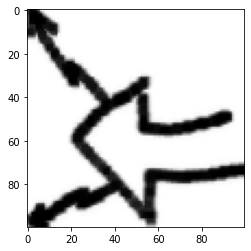

In [10]:
plt.imshow(generate(img,apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_transformation = True, apply_boldness = True, boldness_dir = 1, boldness_str = 1) ,cmap='gray')

### Add noise

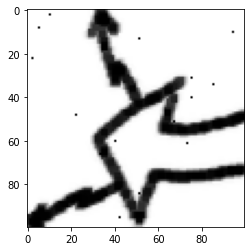

In [11]:
plt.imshow(generate(img,apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_transformation = True, apply_boldness = True, boldness_dir = 1, boldness_str = 1, add_noise = True) ,cmap='gray')

### Scale to binary. No noise

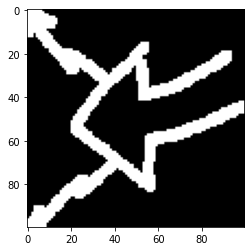

In [12]:
plt.imshow(generate(img,apply_rotation = True, rotation = 8*i, padding_val = img[0,0], apply_transformation = True, apply_boldness = True, boldness_dir = 1, boldness_str = 1, scale_to_binary = True) ,cmap='gray')